# Aggregation

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib 
%matplotlib  inline
import matplotlib.pyplot as plt 
import seaborn as sns    #没有讲   画出更漂亮的图  

In [2]:
sns.set_style('dark')    #幕布背景颜色   也可以指定  white 等

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [6]:
df_wine = pd.read_csv('winequality-red.csv',sep=';')   #对酒精数据进行品质预测

In [5]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine['alcohol'].mean()   #酒精含量的平均值

10.422983114446502

In [8]:
df_wine.shape

(1599, 12)

In [9]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

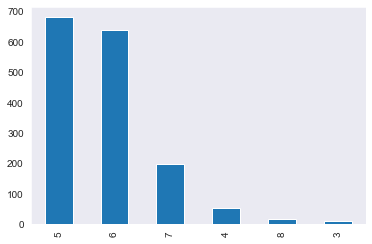

In [10]:
df_wine.quality.value_counts().plot(kind =  'bar')

## group  by  one key

In [11]:
wino = df_wine.groupby('quality')

In [12]:
wino_df = wino.mean()

In [19]:
wino_df.alcohol

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

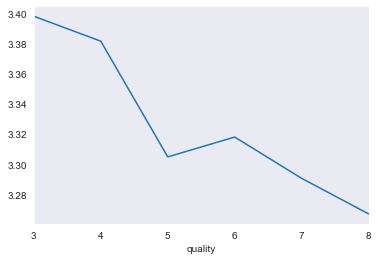

In [21]:
wino_df.pH.plot()   #酒越好  ph越低   酸性越强

## group by two key

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
mean=df.Survived.groupby([df.Pclass,df.Sex]).mean()

In [29]:
mean.unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


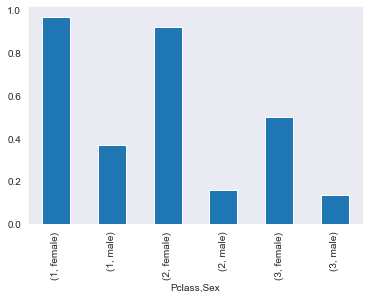

In [30]:
df.Survived.groupby([df.Pclass,df.Sex]).mean().plot.bar()

In [32]:
df.Survived.groupby([df.Pclass,df.Sex]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

## 怎么遍历

In [34]:
for name,group in wino:
    print(name)
    print(group)

3
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0    

In [37]:
index = ['a','b','c','d','e']
data =DataFrame(np.random.randn(5,5),columns = ['apple','orange','cucumber','banana','potato'],index =index)

In [38]:
data

,apple,orange,cucumber,banana,potato
a,-0.698302,1.001383,-0.173670,-0.884881,0.104601
b,-0.550375,0.776759,0.114919,-0.492086,0.796985
c,0.535833,0.532560,0.118138,-0.794605,0.590977
d,-3.143325,-0.669109,0.696250,0.237352,1.657379
e,0.550989,0.635648,-0.616084,0.760465,-0.024029


In [39]:
 goods={'apple':'fruit','orange':'fruit','cucumber':'veg','banana':'fruit','potato':'veg'}

In [40]:
goods_by_data = data.groupby(goods,axis =1)

In [41]:
goods_by_data.sum()

,fruit,veg
a,-0.581800,-0.069069
b,-0.265702,0.911905
c,0.273787,0.709116
d,-3.575082,2.353629
e,1.947102,-0.640113


In [42]:
def range_values(arr):
    return arr.max()-arr.min()

In [44]:
wino.agg(range_values)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [47]:
df_wine['qual/alc ratio']=df_wine['quality']/df_wine['alcohol']

In [48]:
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [50]:
df_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


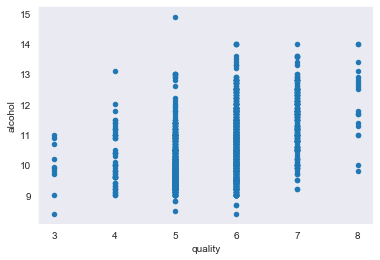

In [52]:
%matplotlib inline
df_wine.plot(kind = 'scatter',x = 'quality',y = 'alcohol')

## 练习

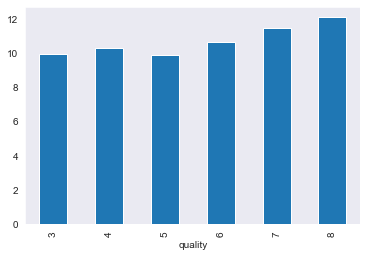

In [55]:
df_wine.groupby([df_wine.quality]).mean().alcohol.plot(kind = 'bar',y='alcohol')